## Spectral Clustering and Semi-Supervised Learning

#### This notebook contains different values and imports that can be used in this practical session.
#### Please keep the same variable names when provided in your report to make the work of teaching assistants easier. 
#### You can still change the values given or the sizes of the datasets treated if you believe it is usefull to illustrate your point.

#### You can directly edit the markdown boxes to add your comments and answers to the questions

In [1]:
#  (imports and advised values):
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

n_samples = 200 # You can change these values
noise_level_list = [.05,.1,.2] # You can change these values

###  Complete the code in the box below

For different values of noise, we some datasets.

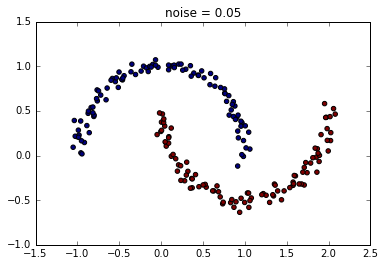

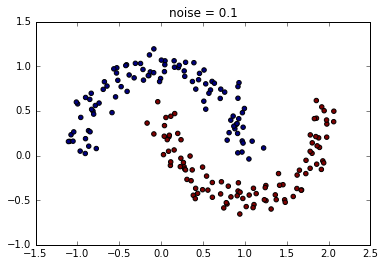

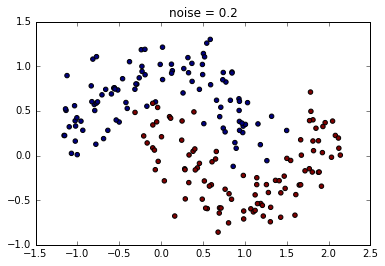

In [211]:
from sklearn import datasets

X_s = []
y_s = []

for noise in noise_level_list:
    noisy_moons = datasets.make_moons(n_samples=n_samples, noise=noise)
    x = noisy_moons[0][:,0]
    y = noisy_moons[0][:,1]
    plt.scatter(x, y, c=noisy_moons[1])
    plt.title("noise = " + str(noise))
    plt.show()
    
    X_s.append(noisy_moons[0])
    y_s.append(noisy_moons[1])

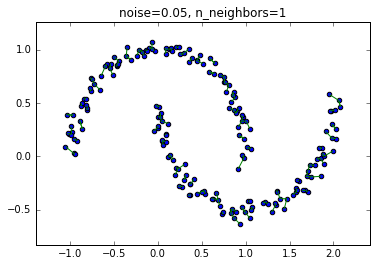

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


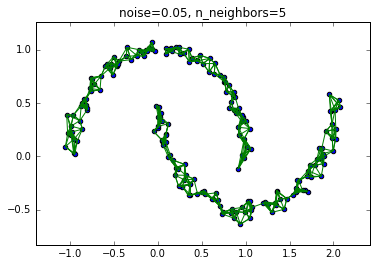

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


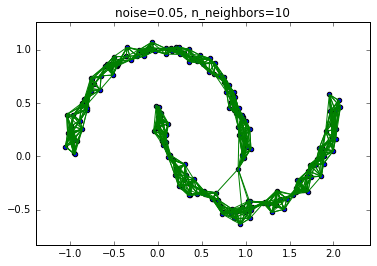

[[ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


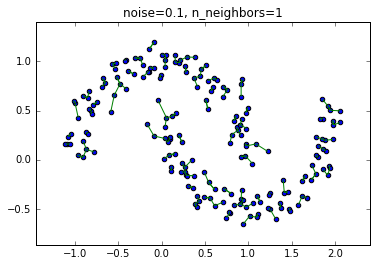

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


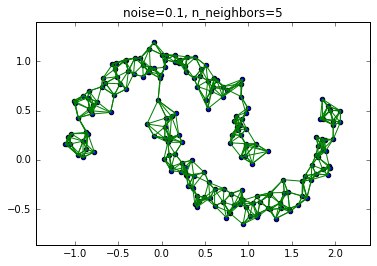

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


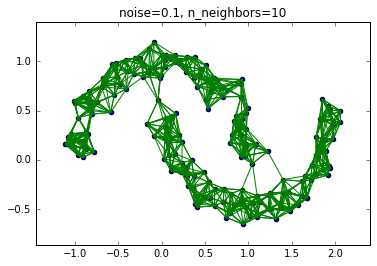

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


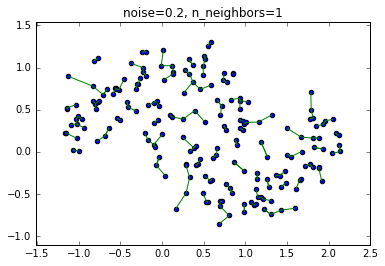

[[ 0.  1.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


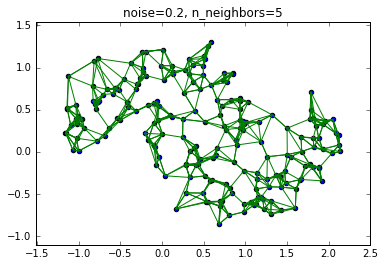

[[ 0.  1.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


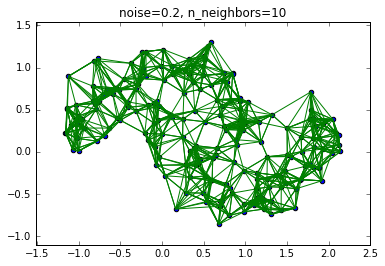

[[ 0.  1.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [225]:
from sklearn.neighbors import kneighbors_graph
from matplotlib import collections as mc

n_neighbors_list = [1,5,10] # You can change these values

W_s = []

for X, y, noise in zip(X_s, y_s, noise_level_list):
    affinity_matrices = []
    for k in n_neighbors_list:
        W = kneighbors_graph(X, k, mode='connectivity', include_self=False)
        affinity_matrices.append(W)

        lines = []
        for i in range(W.shape[0]):
            for j in range(0, W.shape[1]):
                if W[i, j] == 1.0:
                    lines.append([X[i], X[j]])

        lc = mc.LineCollection(lines, linewidths=1, color='green')
        fig, ax = plt.subplots()
        ax.add_collection(lc)
        ax.autoscale()
        ax.margins(0.1)

        plt.scatter(X[:, 0], X[:, 1])
        plt.title('noise='+str(noise) + ', n_neighbors='+str(k))
        plt.show()
        print(W.toarray())
        
    W_s.append(affinity_matrices)

We can see that number of connections between the points of different clusters increase with noise.

###  Optimization problem 

We are going to recall the optimization problem leading to the Normalized-cut Spectral Clustering. We call k the number of clusters. 

We have :
$$ Ncut(A_1,...,A_k) = \frac{1}{2} \sum_{i=1}^{k} \frac{W(A_i,\bar{A_i})}{Vol(A_i)} $$

The problem consists to minimizing Ncut($A_1,...,A_k$)
where 

$$ W(A,B) = \sum_{i \in A,j \in B} \omega_{i,j} $$
$$ Vol(A) = \sum_{i \in A} d_i$$

Where D is the degree matrix.

We choose $k=2$.

It is interesting to use the Laplacien because if we define he cluster indictor vector like follow : 

$$ f_i = \left\{\def\arraystretch{1.2}%
  \begin{array}{@{}c@{\quad}l@{}}
    \sqrt(\frac{Vol(\bar{A})}{Vol(A)}) & \text{if $v_i \in A$}\\
    -\sqrt(\frac{Vol(A)}{Vol(\bar{A})}) & \text{if $v_i \in \bar{A}$}\\
  \end{array}\right. $$
  
We get : 

$$ f^{T}Lf = Vol(V) \cdot Ncut(A,\bar{A}) $$


We allow that $f_{i}$ takes arbitrary values in $\mathbb{R}$. This lead us to an optimization problem:

$\min_{f \in \mathbb{R}^n} \frac{f^T L f}{f^T D f}$ s.t. $f^T D 1_n = 0$.

This leads to find the second eigenvector of $L_{sym}$ where $L_{sym} = D^{-\frac{1}{2}} (D - W) D^{-\frac{1}{2}}$

In [2]:

from sklearn.neighbors import kneighbors_graph
n_neighbors_list = [1,5,10] # You can change these values

C:\Users\Samuel\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:217: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


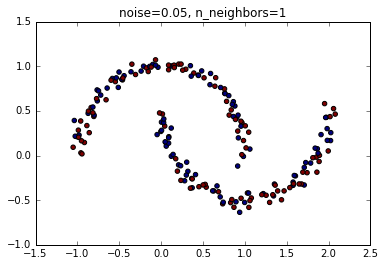

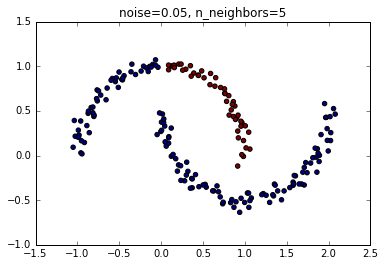

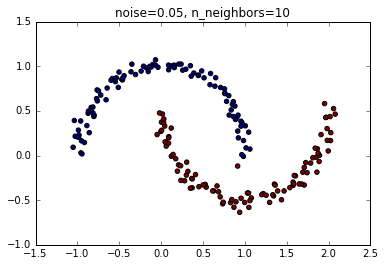

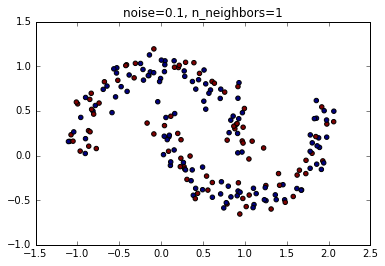

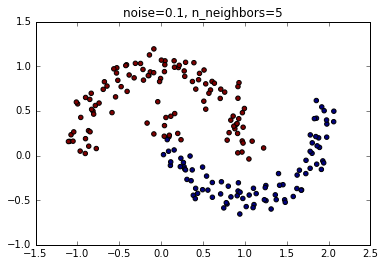

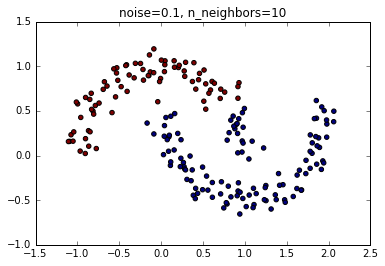

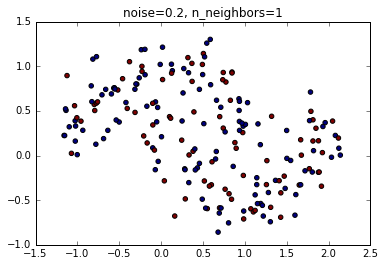

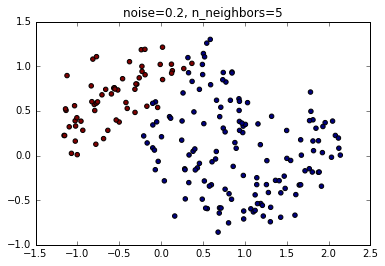

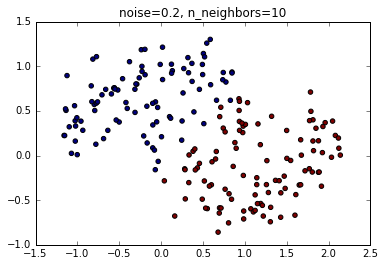

In [217]:
from sklearn.cluster import SpectralClustering

for i in range(len(X_s)):
    X = X_s[i]
    noise = noise_level_list[i]
    
    for k in n_neighbors_list:
        clf = SpectralClustering(n_clusters=2, n_neighbors=k, affinity='nearest_neighbors')
        y = clf.fit_predict(X)

        plt.scatter(X[:, 0], X[:, 1], c=y)
        plt.title("noise="+str(noise)+", n_neighbors="+str(k))
        plt.show()

We notice that for each degree of noise, if the number of neighbors is too small, the clusters are not separated properly.

If the number of neighbors is important, we can also have some points appearing in the wrong class. It is important to find a good tradeoff.

In [226]:
from scipy.sparse import lil_matrix
from sklearn.cluster import SpectralClustering
import math

def partition_matrix(y) :
    n = len(y)
    c = np.zeros((n,n))

    for i in range(n):
        for j in range(n):
            if y[i] == y[j]:
                c[i,j] = 1
            else:
                c[i,j] = 0
    return c

def similarity(C1, C2):
    if C1.shape != C2.shape:
        return -1
    
    def dot_product(A, B):
        return np.multiply(A, B).sum()
    
    result = dot_product(C1, C2)
    result /= math.sqrt(dot_product(C1, C1) * dot_product(C2, C2))
    
    return result

def stability_algorithm(clustering_classifier, X, B = 5, percentage = 0.8):
    n = X.shape[0]
    
    y = clustering_classifier.fit_predict(X)
    
    C = partition_matrix(y)
    
    similarities = []

    for _ in range(B):
        n_samples = int(percentage * n)
        indices = np.random.choice(n, size=n_samples, replace=True)
        
        sample = X[indices] # bootstrap

        y_bootstrap = clustering_classifier.fit_predict(sample)
        
        C_bootstrap = partition_matrix(y_bootstrap)
        C_comparable = C[indices, :][:, indices]
        
        cosine_similarity = similarity(C_bootstrap, C_comparable)
        similarities.append(cosine_similarity)
        
    return similarities

C:\Users\Samuel\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:217: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


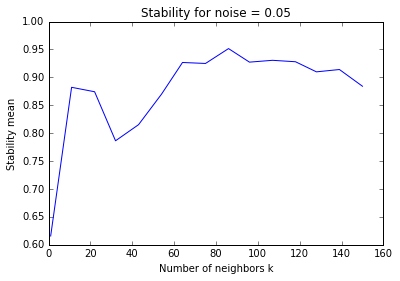

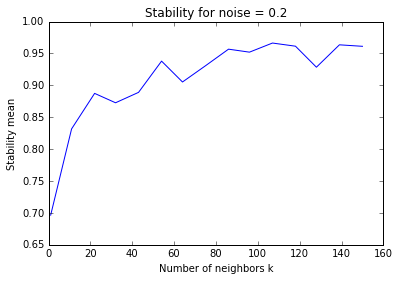

In [229]:
B = 5
percentage = 0.8

noises = [0.05, 0.2]
n_neighbors = np.linspace(1, 150, 15).astype(int)
means = []

for noise in noises:
    means = []
    
    for k in n_neighbors:
        clf = SpectralClustering(n_clusters=2, n_neighbors=k, affinity='nearest_neighbors')
        
        noisy_moons = datasets.make_moons(n_samples=n_samples, noise=noise)
        X_noisy = noisy_moons[0]

        similarities = stability_algorithm(clf, X_noisy, B, percentage)

        means.append(np.mean(similarities))
        
    plt.title("Stability for noise = " + str(noise))
    plt.xlabel("Number of neighbors k")
    plt.ylabel("Stability mean")
    plt.plot(n_neighbors, means)
    plt.show()

We observe that beyond a certain threshold for k, the stability increases and decreases after k being beyond a certain value.

The stability helps to find an appropriate k on the graph, when the curve reaches a maximum.

In the previous cases, we can take k=85 for the non-noisy signal and k=105 for the noisy signal.

In [47]:
from sklearn.cluster import AgglomerativeClustering

B = 10
distances = ["average", "complete"]
noises = [0.05, 0.2]

for distance in distances:
    for noise in noises:
        noisy_moons = datasets.make_moons(n_samples=n_samples, noise=noise)
        X_noisy = noisy_moons[0]
        clf = AgglomerativeClustering(n_clusters=2, affinity="cityblock", linkage=distance)
        

        similarities = stability_algorithm(clf, X_noisy, B, percentage)
        print("Distance: " + distance + ", noise: " + str(noise))
        print(np.mean(similarities))

Distance: average, noise: 0.05
0.751760081142
Distance: average, noise: 0.2
0.70658551165
Distance: complete, noise: 0.05
0.745473881262
Distance: complete, noise: 0.2
0.660879444028


The hierarchical clustering is less stable than the spectral clustering and is more sensitive to noise.

### Experiment on MNIST

In [239]:
from sklearn.datasets import fetch_mldata
from sklearn.cross_validation import train_test_split
mnist = fetch_mldata('MNIST original')
X, y = mnist.data, mnist.target
_, X, _, y = train_test_split(X, y, test_size=0.01, stratify=y)

700


C:\Users\Samuel\Anaconda3\lib\site-packages\numpy\core\numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
C:\Users\Samuel\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py:72: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return [func(*args, **kwargs) for func, args, kwargs in self.items]


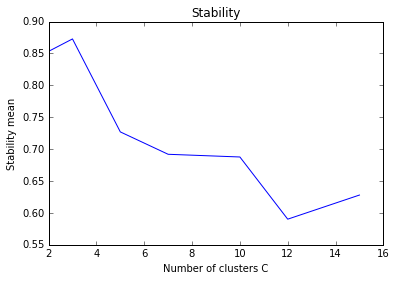

In [240]:
means = []

n = X.shape[0]

C_s = [2, 3, 5, 7, 10, 12, 15]

for C in C_s:
    clf = SpectralClustering(n_clusters=C, n_neighbors=n/10, affinity='nearest_neighbors')

    similarities = stability_algorithm(clf, X, B, percentage)

    means.append(np.mean(similarities))
    
        
plt.title("Stability")
plt.xlabel("Number of clusters C")
plt.ylabel("Stability mean")
plt.plot(C_s, means)
plt.show()

By taking a number of neighbors equal to the number of digits in each class, we observe a peak of stability on the graph for k = 10.


## Semi-Supervised Learning

Choice of the dataset used : **Precise** which dataset you chose and why it is relevant for the semi-supervised learning Task

Advised datasets :

*Breast Cancer Wisconsin (Diagnostic) Database*

*MNIST binary even vs odd (multiple clusters inside each class)*

Feel free to use other datasets if they are relevant

In [153]:
from sklearn.datasets import load_breast_cancer, load_digits
from sklearn.cross_validation import train_test_split


### For all the next questions, use Cancer and Mnist classes to handle your data if you choose to use these one,
### You can also add more datasets but we advise you to handle them with this class for better readability
class semi_sup_dat:
    def __init__(self,data,p_unlabelled,name, test_size=0.2):
        # DON T CHANGE THE RANDOM STATES
        self.name = name
        if self.name == 'Mnist':
            # do an even vs odd binary classification :
            even = [0,2,4,6,8]
            Y = [int(y in even) for y in data.target]
        else:
            Y = data.target
       
        X_train, X_test, y_train, y_test = train_test_split(data.data, Y, test_size=test_size, random_state=32)
        X_lab, X_unlab, y_lab, y_unlab = train_test_split(X_train, y_train, test_size=p_unlabelled, random_state=32)
        
        self.X_lab = X_lab
        self.X_unlab = X_unlab
        self.y_lab = y_lab
        self.y_unlab = y_unlab
        self.X_test = X_test
        self.y_test = y_test


# The following lines can be called later in the code to build a dataset with varying unlabelled proportion
p_unlabelled = 0.75 # You can change this value
Cancer = semi_sup_dat(load_breast_cancer(), p_unlabelled,'Cancer')
digits = load_digits()

Mnist = semi_sup_dat(load_digits(), p_unlabelled,'Mnist')

In [154]:
#  Question 9  : Complete the function self_training
from sklearn.neighbors import KNeighborsClassifier

noisy_moons = datasets.make_moons(n_samples=200, noise=0.2)
X_noisy = noisy_moons[0]
y_noisy = noisy_moons[1]
k = 10
confidence_threshold = 0.97

X_train, X_test, y_train, y_test = train_test_split(X_noisy, y_noisy, test_size=0.2)

class Data:
    def __init__(self, X, y):
        self.data = X
        self.target = y

data = Data(X_train, y_train)
p_unlabelled = 0.8

Moons = semi_sup_dat(data, p_unlabelled,'Moons')

clf = KNeighborsClassifier(n_neighbors=10)

def self_training(dataset, clf):
    X_lab = dataset.X_lab
    X_unlab = dataset.X_unlab
    y_lab = dataset.y_lab
    y_unlab = dataset.y_unlab
    
    X = X_lab
    y = y_lab
    X_u = X_unlab
    
    old_size = X.shape[0] - 10
    
    while(X.shape[0] - old_size > 0):
        old_size = X.shape[0]
        clf.fit(X, y)
        y_u = clf.predict(X_u)
        proba = clf.predict_proba(X_u)
        
        indexes = []
        
        for i in range(proba.shape[0]):
            pred = proba[i]
            for element in pred:
                if element >= confidence_threshold:
                    indexes.append(i)
                    break
        
        X = np.append(X, X_u[indexes, :], axis=0)
        y = np.append(y, y_u[indexes])
            
        X_u = np.delete(X_u, indexes, axis=0)
        y_u = np.delete(y_u, indexes)
        
for dataset, name in zip([Cancer, Mnist], ["Cancer", "Mnist"]):
    #dataset = Cancer
    #name = "Cancer"
    print("Dataset: " + name)
    self_training(dataset, clf)
    clf_classic = KNeighborsClassifier(n_neighbors=10)
    clf_classic.fit(dataset.X_lab, dataset.y_lab)

    semi_supervised_score = clf.score(dataset.X_test, dataset.y_test)
    classic_score = clf_classic.score(dataset.X_test, dataset.y_test)

    print("Score with semi-supervised learning: " + str(semi_supervised_score))
    print("Score without semi-supervised learning: " + str(classic_score))
    print()


Dataset: Cancer
Score with semi-supervised learning: 0.850877192982
Score without semi-supervised learning: 0.833333333333

Dataset: Mnist
Score with semi-supervised learning: 0.977777777778
Score without semi-supervised learning: 0.975



We see that the score has been improve with the semi-supervised self-training technique. Indeed the extra information about $p(x)$ given by the unlabeled data helps the model in the prediction of $p(y|x)$.


###### Closed form expression :

- We have: $J(\alpha) = \frac{1}{l} \Vert Y - JK\alpha \Vert^2 + \lambda \alpha^T K \alpha + \frac{\lambda_u}{(u + l)^2} \alpha^T KLK \alpha$ where J is an (l + u)x(l + u) diagonal matrix where the first l coefficients equal to 1 and the others equal to 0 and $Y = (y_1, ..., y_l, 0, ..., 0)$. K is the Gram matrix of the kernel function.

- To find the optimal f, we derivate the last function in function to $\alpha$ and this term equals 0 for an optimal $\alpha$:
$\frac{1}{l} (Y - JK\alpha)^T (- JK) + (\lambda K + \frac{\lambda_u l}{(u+l)^2}KLK)\alpha = 0$

- Finally $\alpha^* = (JK + \lambda l I + \frac{\lambda_u l}{(u + l)^2} LK)^{-1}Y$

In [179]:
from sklearn.metrics.pairwise import rbf_kernel # Or reimplement it yourself if your prefer
from scipy.linalg import block_diag
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import r2_score
import math

class LapRLS:
    
    def __init__(self, lambda_, lambda_u, gamma, n_neighbors=10, kernel='gaussian'):
        self.fitted = False
        self.kernel = kernel
        self.lambda_ = lambda_
        self.lambda_u = lambda_u
        self.gamma = gamma
        self.n_neighbors = n_neighbors
        
    def fit(self, X_lab, X_unlab, y_lab):
        X = np.vstack([X_lab, X_unlab])
        self.X = X
        
        l = len(y_lab)
        u = X_unlab.shape[0]
        n = l + u
        
        K = rbf_kernel(X, X)
            
        Y = np.zeros(X.shape[0])
        Y[:l] = y_lab
        Y = Y.reshape((-1, 1))
        
        J = np.diag(np.hstack([np.ones(l), np.zeros(u)]))
        
        #W = kneighbors_graph(X, self.n_neighbors, mode='connectivity', include_self=False)
        W = rbf_kernel(X, X, gamma = self.gamma)
        D = np.diag(W.sum(axis=1))
        L = D - W
        
        A = (J.dot(K) + self.lambda_ * l * np.eye(n) + (self.lambda_u * l)/(math.pow(u + l, 2)) * K.dot(L).dot(K))
        
        
        self.alpha = np.linalg.solve(A, Y)
        self.fitted = True
        
    def predict(self, X):
        if not self.fitted:
            print("Must fit first.")
            return
        
        K = rbf_kernel(X, self.X)
        y = K.dot(self.alpha)
        
        return y.flatten()
    
    def score(self, X, y):
        pred = self.predict(X)
        
        return r2_score(y, pred)

    

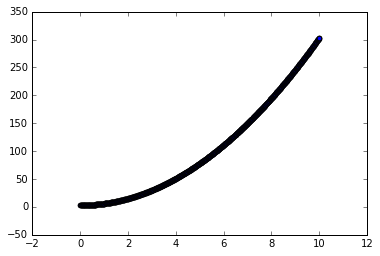

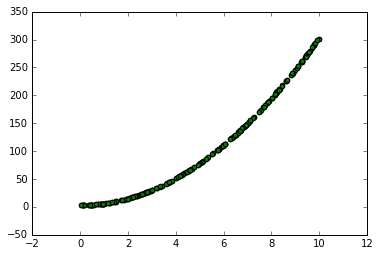

Score for quadratic function: 0.999996153029
Score for Iris: 0.934175486226


In [198]:
from sklearn.datasets import load_iris


X = np.linspace(0, 10, 1000)
y = 3*X**2 + 3

plt.scatter(X, y)
plt.show()

X = X.reshape((-1, 1))

data = Data(X, y)
dataset = semi_sup_dat(data, p_unlabelled,'parabol')

clf = LapRLS(1e-5, 1e-2, 5)

clf.fit(dataset.X_lab, dataset.X_unlab, dataset.y_lab)
pred = clf.predict(dataset.X_test)
score = clf.score(dataset.X_test, dataset.y_test)

plt.scatter(dataset.X_test, dataset.y_test)
plt.scatter(dataset.X_test, pred, c='green')
plt.show()

print("Score for quadratic function: " + str(score))

Iris = semi_sup_dat(load_iris(), p_unlabelled,'Iris')
dataset = Iris

clf.fit(dataset.X_lab, dataset.X_unlab, dataset.y_lab)
pred = clf.predict(dataset.X_test)
score = clf.score(dataset.X_test, dataset.y_test)

print("Score for Iris: " + str(score))



Let's fix the value of $\lambda$. We now test different values of $\lambda_u$ et see the influence on the score.

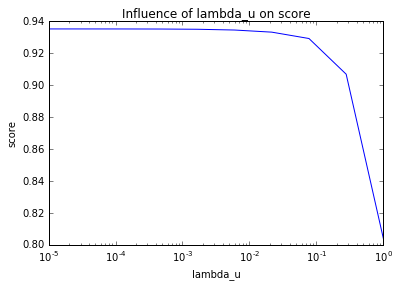

In [205]:
lambda_ = 1e-5
grid = np.logspace(-5, 0, 10)

scores = []

for lambda_u in grid:
    clf = LapRLS(lambda_, lambda_u, 5)
    clf.fit(dataset.X_lab, dataset.X_unlab, dataset.y_lab)
    score = clf.score(dataset.X_test, dataset.y_test)
    scores.append(score)
    
plt.plot(grid, scores)
plt.xscale('log')
plt.title('Influence of lambda_u on score')
plt.ylabel('score')
plt.xlabel('lambda_u')
plt.show()

We see that the score is the same until a certain threshold of $\lambda_u$. Beyond that threshold, the score decreases.



- The first limitation is that we need to invert a large matrix (or use gauss pivot with the "solve" technique).

- The previous algorithm will struggle to scale.

- We can instead use a descent algorithm to find an approximate minimum.

In [318]:
from scipy.optimize import fmin_l_bfgs_b

n_iter = 50
iis = np.random.randint(0, n, n * n_iter)  

def sgd(x_init, iis, grad_i, n_iter=100, step=1., callback=None):
    """Stochastic gradient descent algorithm."""
    x = x_init.copy()
    
    for idx in range(n_iter):
        i = iis[idx]
        
        ### TODO
        
        x = x - step / (math.sqrt(idx + 1)) * grad_i(i, x)

        ### END TODO
        
        # Update metrics after each iteration.
        if callback and idx % n == 0:
            callback(x)
    return x


class LapRLS:
    
    def __init__(self, lambda_, lambda_u, gamma, n_neighbors=10, kernel='gaussian'):
        self.fitted = False
        self.kernel = kernel
        self.lambda_ = lambda_
        self.lambda_u = lambda_u
        self.gamma = gamma
        self.n_neighbors = n_neighbors
        
    def fit(self, X_lab, X_unlab, y_lab):
        X = np.vstack([X_lab, X_unlab])
        self.X = X
        
        l = len(y_lab)
        u = X_unlab.shape[0]
        n = l + u
        
        K = rbf_kernel(X, X)
            
        Y = np.zeros(X.shape[0])
        Y[:l] = y_lab
        Y = Y.reshape((-1, 1))
        
        J = np.diag(np.hstack([np.ones(l), np.zeros(u)]))
        
        #W = kneighbors_graph(X, self.n_neighbors, mode='connectivity', include_self=False)
        W = rbf_kernel(X, X, gamma = self.gamma)
        D = np.diag(W.sum(axis=1))
        L = D - W
        
        def cost(alpha):
            tmp = Y-J.dot(K).dot(alpha)
            tmp = tmp.reshape((-1, 1))
            cost = (1/l) *tmp.T.dot(tmp) + self.lambda_ * alpha.T.dot(K).dot(alpha) + self.lambda_u/(u + l)**2 * alpha.T.dot(K).dot(L).dot(K).dot(alpha)
            return cost
        
        def grad(alpha):
            grad = (1/l * (Y - J.dot(K).dot(alpha)).T.dot(-J.dot(K))).reshape((-1, 1)) + self.lambda_ * K.dot(alpha) + ((self.lambda_u * l / (u + l)**2) * K.dot(L).dot(K)).dot(alpha)
            
            return grad
        
        alpha_0 = np.zeros(n).reshape((-1, 1))
        
        grad_i = 
        
        #self.alpha = sgd(alpha_0, iis, grad_i)
        
        
        self.fitted = True
        
        
    def predict(self, X):
        if not self.fitted:
            print("Must fit first.")
            return
        
        K = rbf_kernel(X, self.X)
        y = K.dot(self.alpha)
        
        return y.flatten()
    
    def score(self, X, y):
        pred = self.predict(X)
        
        return r2_score(y, pred)

    

In [ ]:
reg = LapRLS(1e-5, 1e-2, 5)

dataset = Iris

reg.fit(dataset.X_lab, dataset.X_unlab, dataset.y_lab)
pred = reg.predict(dataset.X_test)
score = reg.score(dataset.X_test, dataset.y_test)
print(score)

Unfortunately, I did not find find any efficient way to compute SGD in O(n).